In [13]:
import numpy as np
import os

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation, MeanShift, SpectralClustering, Birch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import adjusted_rand_score

from yellowbrick.cluster import KElbowVisualizer

import utils

import warnings
warnings.filterwarnings('ignore')

# Чтение данных

In [14]:
train_path = "../UCI HAR Dataset/train/"
test_path = "../UCI HAR Dataset/test/"
x_train = np.genfromtxt(train_path + "X_train.txt")
y_train = np.genfromtxt(train_path + "y_train.txt")
x_test = np.genfromtxt(test_path + "X_test.txt")
y_test = np.genfromtxt(test_path + "y_test.txt")

N_CLUSTERS = len(np.unique(y_train))
print(f"Количество кластеров = {N_CLUSTERS}")


Количество кластеров = 6


# Кластеризация и сравнение с исходными данными

KMeans

In [15]:
k_means = KMeans(n_clusters=N_CLUSTERS)
params = {"init": ['k-means++', 'random'], "algorithm": ['lloyd', 'elkan']}
k_means = utils.grid_search(k_means, params, x_train, y_train, scoring='adjusted_rand_score')
predicted = k_means.predict(x_test)
print(adjusted_rand_score(y_test, predicted))

0.47493266369372206


AgglomerativeClustering

In [16]:
agc = AgglomerativeClustering(n_clusters=N_CLUSTERS)
predicted = agc.fit_predict(x_test)
print(adjusted_rand_score(y_test, predicted))

0.4888094573945107


DBScan игнорирую, так как он не позволяет напрямую выбрать количество кластеров

# Кластеризация с оптимальным количеством кластеров

Поиск числа кластеров методом локтя

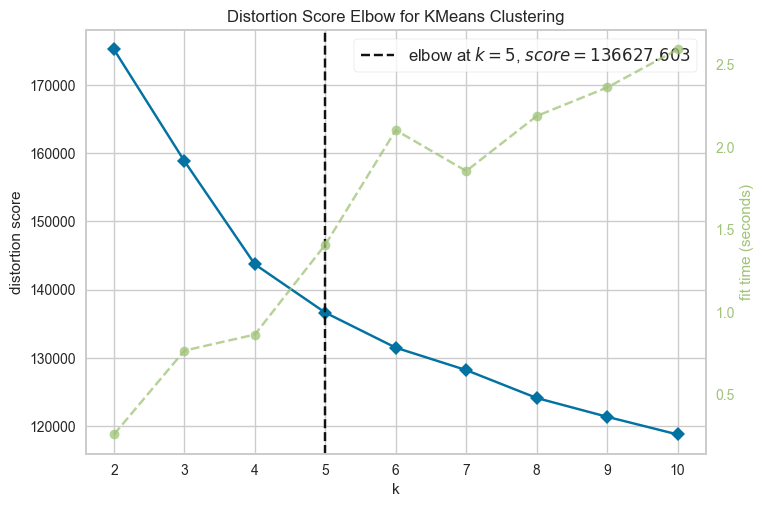

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
visualiser = KElbowVisualizer(KMeans())
visualiser.fit(x_train, y_train)
visualiser.show()

In [18]:
n_clusters = 5

KMeans

In [19]:
k_means = KMeans(n_clusters=n_clusters)
params = {"init": ['k-means++', 'random'], "algorithm": ['lloyd', 'elkan']}
k_means = utils.grid_search(k_means, params, x_train, y_train, scoring='adjusted_rand_score')
predicted = k_means.predict(x_test)
print(adjusted_rand_score(y_test, predicted))

0.4697875228397497


AgglomerativeClustering

In [20]:
agc = AgglomerativeClustering(n_clusters=n_clusters)
predicted = agc.fit_predict(x_test)
print(adjusted_rand_score(y_test, predicted))

0.49164258530695853
